## 1. 문제정의
- 버섯의 특징을 활용해 독/식용버섯인지 분류하기

## 2. 데이터 수집

In [1]:
import pandas as pd
data = pd.read_csv('mushroom.csv')
data.head() # 데이터 읽어온 후에 간단히 확인할 때 

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


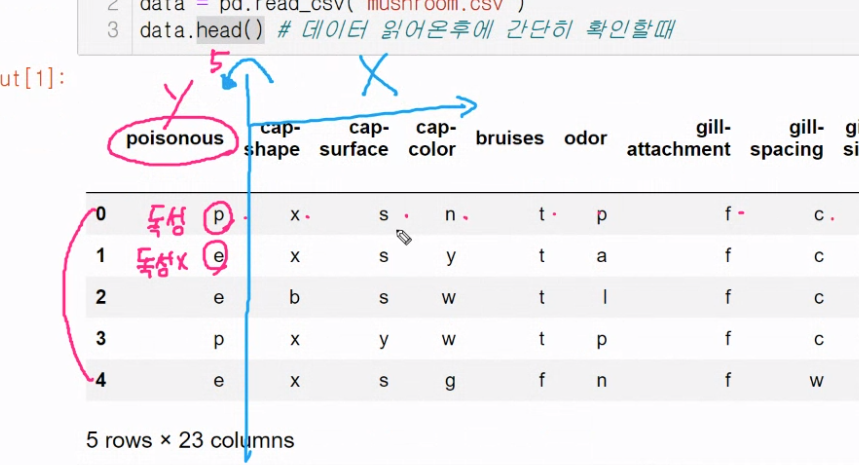

In [2]:
# 데이터 크기 확인
data.shape

(8124, 23)

## 3. 데이터 전처리

In [3]:
# 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# 이상치 확인
# 숫자 데이터가 아니기 때문에 이상치 확인 불가능
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 4. 탐색적 데이터 분석

## 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [ ]:
data.head()

In [26]:
# 데이터 나누기
# 문제와 정답
X = data.loc[ : , 'cap-shape' : ] # cap-shape부터 끝까지
y = data.loc[ : , 'poisonous'] # poisonous만 사용

In [27]:
X.shape, y.shape

((8124, 22), (8124,))

In [28]:
# 문자 데이터를 수치형으로 변환
# Label 인코딩 : 하나의 문자에 하나의 숫자를 대입
X1 = X.copy() #: 하나가 변경되면 둘다 바뀜

In [29]:
# onehot 인코딩
# 변경 후의 머신러닝 결과가 좋은편

In [30]:
X1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [31]:
X1["cap-shape"] = X1["cap-shape"].map({"x":0, "f":1, "k":2, "b":3, "s":4, "c":5})

In [32]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


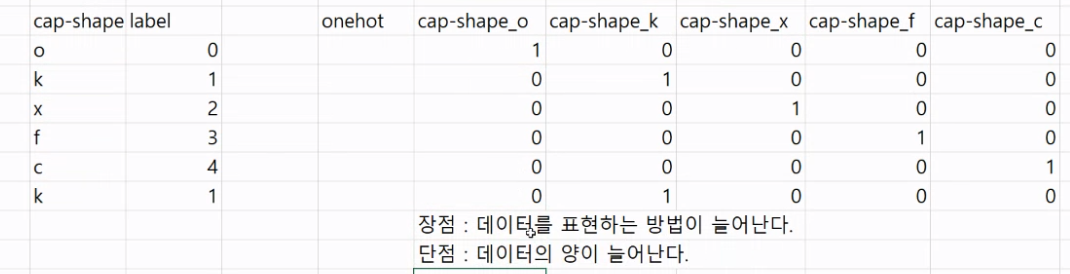

In [33]:
X2 = X.copy()
# pd. get_dummies(대상) :  원핫 인코딩 함수
X_onehot =  pd.get_dummies(X2)
X_onehot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
# 훈련과 평가 데이터셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, random_state = 6)

In [45]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
tree_md4 = DecisionTreeClassifier(max_depth=4)
tree = DecisionTreeClassifier()

## 6. 학습

In [46]:
tree.fit(X_train, y_train)
tree_md4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

## 7. 평가

In [47]:
tree.score(X_train, y_train)

1.0

In [48]:
tree.score(X_test, y_test)

1.0

In [49]:
# train과 test의 점수가 1.0이 나왔다
# 1. 데이터가 너무 간단하다
# 2. 중간에 값이 잘못들어갔다

In [50]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
1.0


In [52]:
print(tree_md4.score(X_train, y_train))
print(tree_md4.score(X_test, y_test))

0.9944198260298703
0.9911373707533235


In [ ]:
# 교차 검증
# 데이터에 변화를 주면서 여러가지 값으로 모델 성능 확인하기
# 데이터를 여러가지로 나누어서 학습하고 평가하기

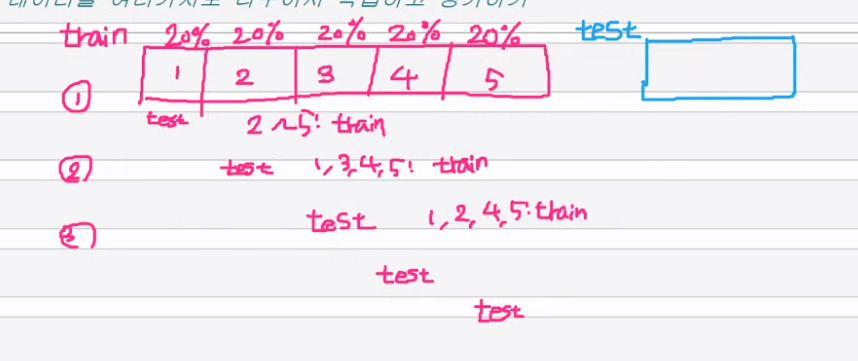

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
# 사용할 모델, X, y, 데이터 분할 수
cross_val_score(tree, X_train, y_train, cv = 5)

array([1., 1., 1., 1., 1.])

In [56]:
cross_val_score(tree_md4, X_train, y_train, cv = 5).mean()

0.991467339106727

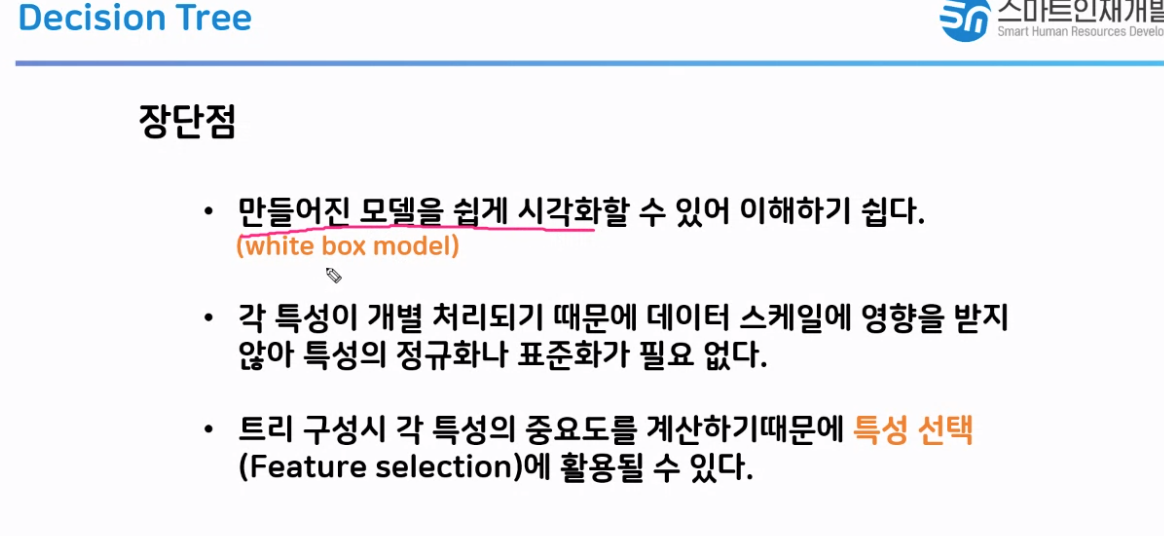

## 8. 시각화

In [57]:
!pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


In [58]:
# 경로 설정
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [62]:

from sklearn.tree import export_graphviz
export_graphviz(tree_md4, out_file='tree.dot', # 규칙을 파일로 만들기
               class_names=['p','e'], # p : 독성, e : 식용
               feature_names=X_onehot.columns, # 사용한 데이터의 컬럼 이름
               impurity=False, # 불순도를 표시할건지
               filled=True) # 노드의 색깔을 표현 할건지 

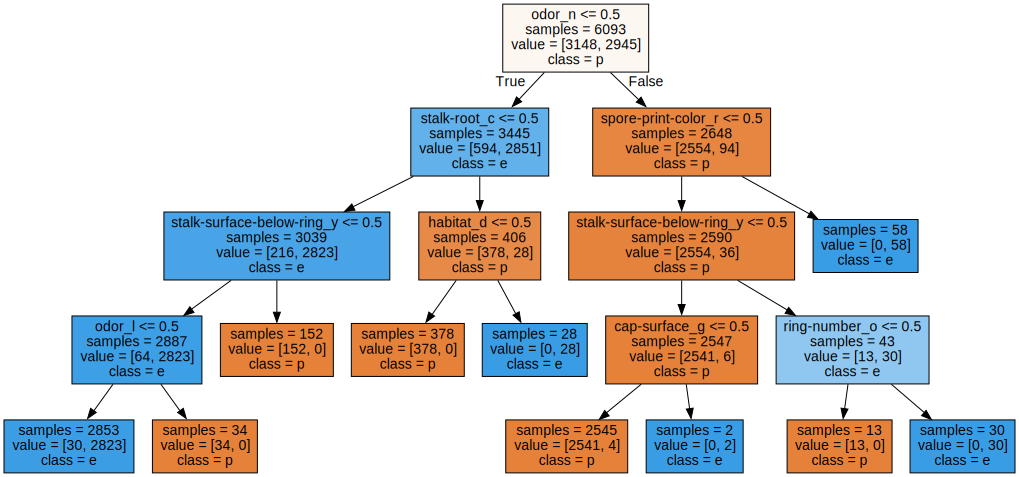

In [63]:
# tree.dot을 시각화
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [64]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

## 특성 선택
- 122개의 컬럼이 생성
- 질문에 사용된 컬럼은 훨씬 적음
- 질문마다의 중요도를 DecisionTree가 구분했다

In [68]:
fi = tree.feature_importances_ # 부동소수점, 소수점의 위치가 변하지 않게 숫자를 표현
# 모든 값의 합 : 1

In [66]:
X_onehot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [69]:
df = pd.DataFrame(fi, index = X_onehot.columns)
df.sort_values(by = 0,ascending = False)

,0
odor_n,0.617338
stalk-root_c,0.174074
stalk-root_r,0.090740
spore-print-color_r,0.036255
odor_l,0.021620
...,...
gill-color_b,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000
gill-spacing_c,0.000000


In [ ]:
# 만약 나중에 학습, 예측에 시간이 너무 오래걸린다
# > 모델 경량화 >  하이퍼파라미터 튜닝, 데이터를 줄이자 
# 데이터를 줄일 때 중요하지 않은 컬럼부터 삭제